# Analyze and Visualize the Data using Python

##### In this step, we analyze and visualize the results of our SQL queries using Python

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Create a connection to the SQLite database
conn = sqlite3.connect('library_data.db')

In [10]:
# Load the data into DataFrames
books_with_authors = pd.read_sql('''
SELECT books.title, authors.author_name, books.genre, books.published_year
FROM books
INNER JOIN authors ON books.author_id = authors.author_id
''', conn)

authors_with_books = ('''
SELECT authors.author_name, books.title, books.genre, book.published_year
FROM authors
LEFT JOIN books ON authors.author_id =  books.author_id
''', conn)

borrowers_with_books = pd.read_sql('''
SELECT borrowers.borrower_name, books.title, borrowers.borrow_date
FROM borrowers
INNER JOIN books ON borrowers.borrowed_book_id = books.book_id 
''', conn)


In [11]:
# Close the connection
conn.close()

In [12]:
# Set style
sns.set_style('whitegrid')

C:\Users\user\AppData\Local\Temp\ipykernel_6012\842244809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=books_with_authors, x='genre', palette='viridis')


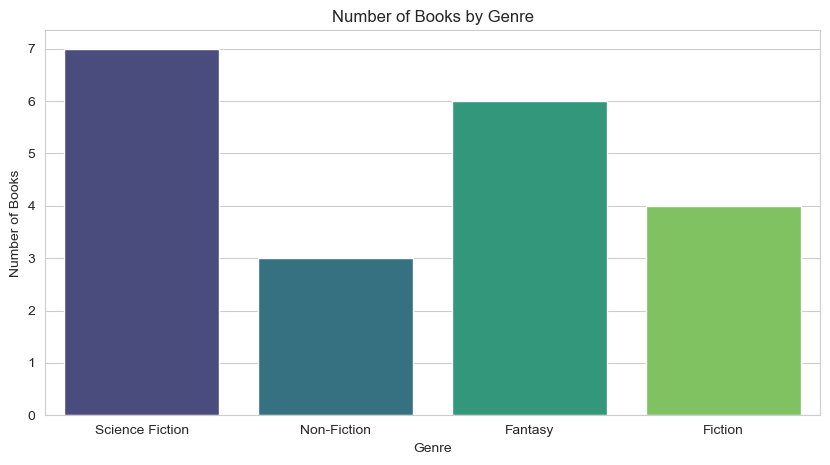

In [13]:
# Plot the number of books by genre
plt.figure(figsize=(10, 5))
sns.countplot(data=books_with_authors, x='genre', palette='viridis')
plt.title('Number of Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6012\1423343275.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=books_with_authors, x='published_year', palette='magma')


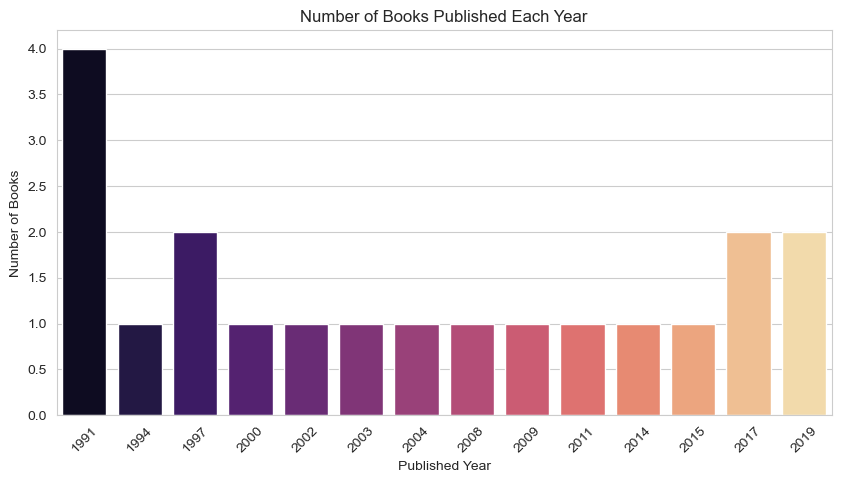

In [18]:
# Plot the number of books published each year
plt.figure(figsize=(10, 5))
sns.countplot(data=books_with_authors, x='published_year', palette='magma')
plt.title('Number of Books Published Each Year')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6012\4119310437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=borrowers_with_books, y='borrower_name', palette='coolwarm')


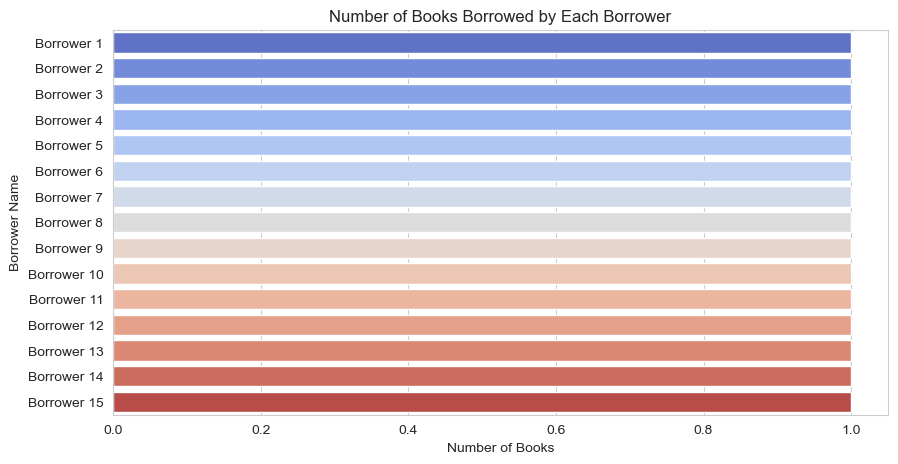

In [20]:
# Plot the number of books borrowed by each borrower
plt.figure(figsize=(10, 5))
sns.countplot(data=borrowers_with_books, y='borrower_name', palette='coolwarm')
plt.title('Number of Books Borrowed by Each Borrower')
plt.xlabel('Number of Books')
plt.ylabel('Borrower Name')
plt.show()